In [1]:
import plotly.graph_objects as go
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random
import os
from wordcloud import WordCloud
from plotly.offline import init_notebook_mode, iplot
from PIL import Image
import os

In [2]:
pwd = os.getcwd()

nft = pwd + "/netflix_titles.csv"

df = pd.read_csv(nft)


In [3]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
if null_rate > 0 :
    print("{} null rate: {}%".format(i,round(null_rate,2)))

In [4]:
#dealing with duplicates
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)
df.dropna(inplace=True)
df.drop_duplicates(inplace= True)

In [5]:
#adding new columns for later use
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month 
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [6]:
df ['month_name_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_name_added, Length: 8790, dtype: object

In [7]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_added         0
month_name_added    0
year_added          0
dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   cast              8790 non-null   object        
 5   country           8790 non-null   object        
 6   date_added        8790 non-null   datetime64[ns]
 7   release_year      8790 non-null   int64         
 8   rating            8790 non-null   object        
 9   duration          8790 non-null   object        
 10  listed_in         8790 non-null   object        
 11  description       8790 non-null   object        
 12  month_added       8790 non-null   int64         
 13  month_name_added  8790 non-null   object        
 14  year_added        8790 n

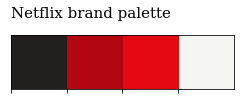

In [9]:
# netflix brand palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette", loc ='left', fontfamily ='serif', fontsize=15, y=1.2,)
plt.show()



In [10]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/1451779816.py:6: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



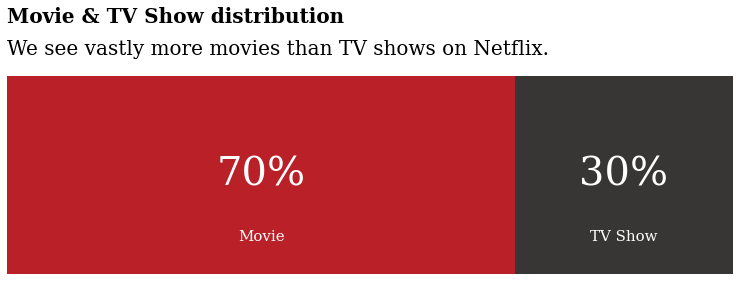

In [11]:
fig, ax = plt.subplots(1,1,figsize=(13, 4))
ax.barh(mf_ratio.index, mf_ratio['Movie'], color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'],color='#221f1f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", xy=(mf_ratio['Movie'][i]/2, i), va = 'center', ha='center', fontsize=40, fontweight='light', fontfamily='serif', color='white')

    ax.annotate("Movie", xy=(mf_ratio['Movie'][i]/2, -0.25), va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif', color='white')
     
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i), va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("TV Show", xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25), va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif', color='white')


fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=20, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=20)  

for s in ['top', 'left', 'right', 'bottom']: ax.spines[s].set_visible(False)
    




ax.legend().set_visible(False)
plt.show()

In [12]:
df['country']

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 8790, dtype: object

In [13]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country']

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: first_country, Length: 8790, dtype: object

In [14]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

In [15]:
df['count']=1 #helper column
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

In [16]:
data

first_country
USA          4031
India        1008
UK            627
Canada        271
Japan         257
France        212
S. Korea      211
Spain         181
Mexico        134
Australia     115
Name: count, dtype: int64

C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/3845689439.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/3845689439.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



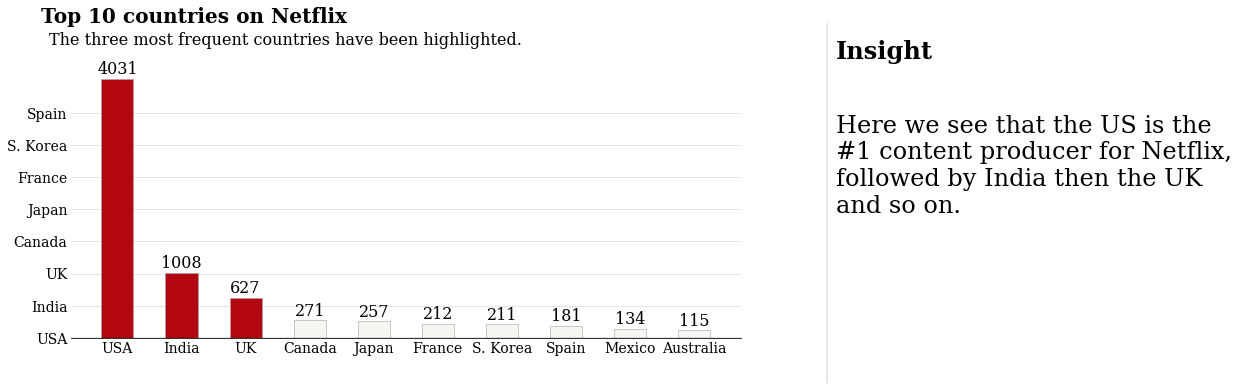

In [17]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' 

fig, ax = plt.subplots(1,1, figsize=(12, 5))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}", xy=(i, data[i] + 150), va = 'center', ha='center',fontweight='light',fontsize=16, fontfamily='serif')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.set_xticklabels(data.index, fontfamily='serif', fontsize=16, rotation=0)
ax.set_yticklabels(data.index, fontfamily='serif', fontsize=16, rotation=0)
fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.94, 'The three most frequent countries have been highlighted.', fontsize=16, fontweight='light', fontfamily='serif')

fig.text(1.01, .9, 'Insight', fontsize=24, fontweight='bold', fontfamily='serif')

fig.text(1.01, 0.4, '''
Here we see that the US is the 
#1 content producer for Netflix,
followed by India then the UK 
and so on. 
'''
, fontsize=24, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax.tick_params(axis='both', which='major', labelsize=14)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/1865495271.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



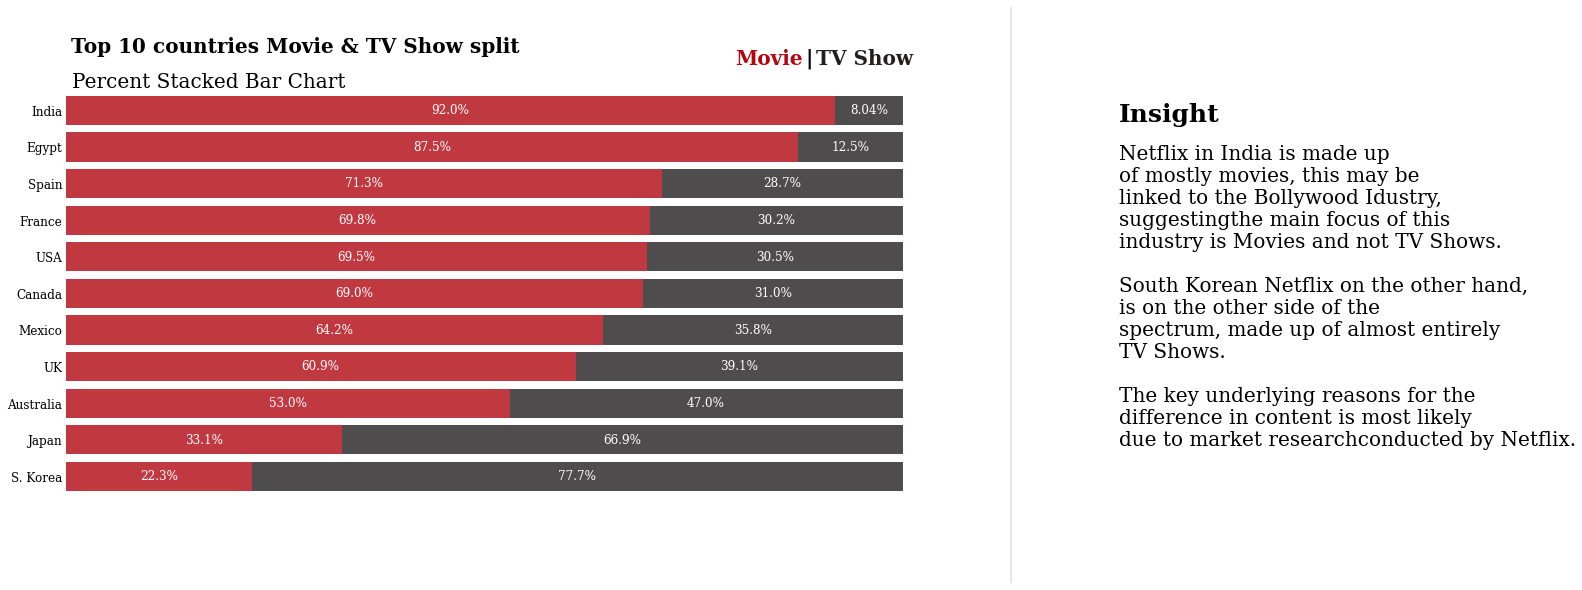

In [18]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.92, 'Top 10 countries Movie & TV Show split', fontsize=20, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.86, 'Percent Stacked Bar Chart', fontsize=20,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.745,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=20, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=20, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=20, color='#221f1f')


fig.text(1.1, 0.8, 'Insight', fontsize=25, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.2, '''
Netflix in India is made up 
of mostly movies, this may be
linked to the Bollywood Idustry, 
suggestingthe main focus of this 
industry is Movies and not TV Shows.

South Korean Netflix on the other hand, 
is on the other side of the 
spectrum, made up of almost entirely 
TV Shows.

The key underlying reasons for the 
difference in content is most likely 
due to market researchconducted by Netflix.
'''
         , fontsize=20, fontweight='light', fontfamily='serif')



import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [19]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/345011922.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



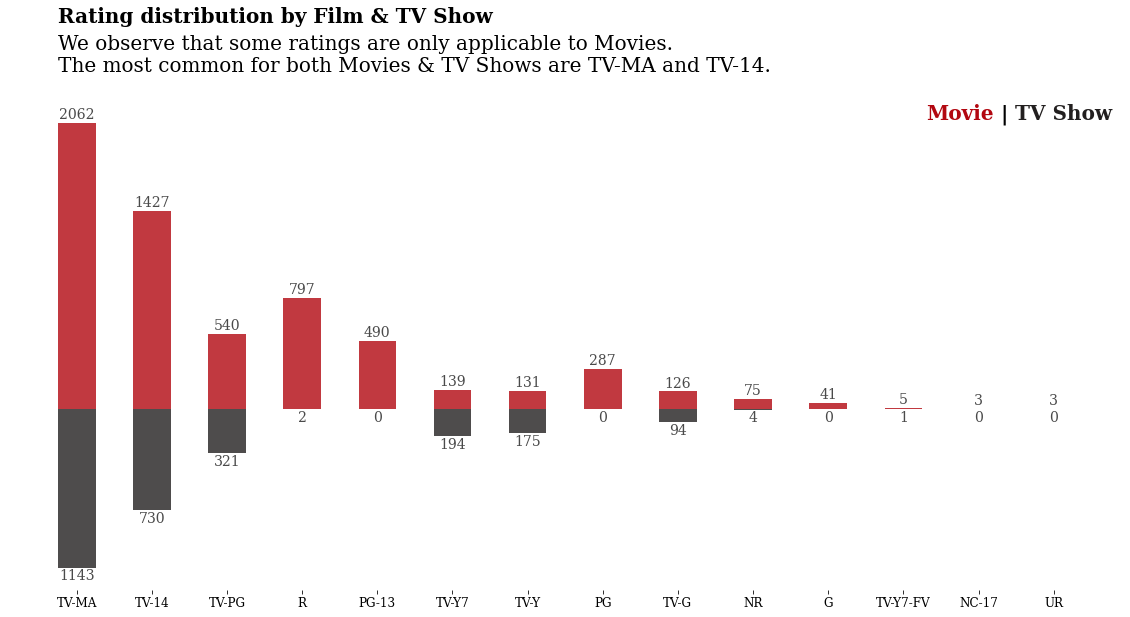

In [20]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(20, 9))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light',fontsize=14, fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light',fontsize=14,fontfamily='serif',
                   color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif',fontsize=12)
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=20, fontweight='light', fontfamily='serif')


fig.text(0.763,0.85,"Movie", fontweight="bold", fontfamily='serif', fontsize=20, color='#b20710')
fig.text(0.815,0.85,"|", fontweight="bold", fontfamily='serif', fontsize=20, color='black')
fig.text(0.825,0.85,"TV Show", fontweight="bold", fontfamily='serif', fontsize=20, color='#221f1f')

plt.show()

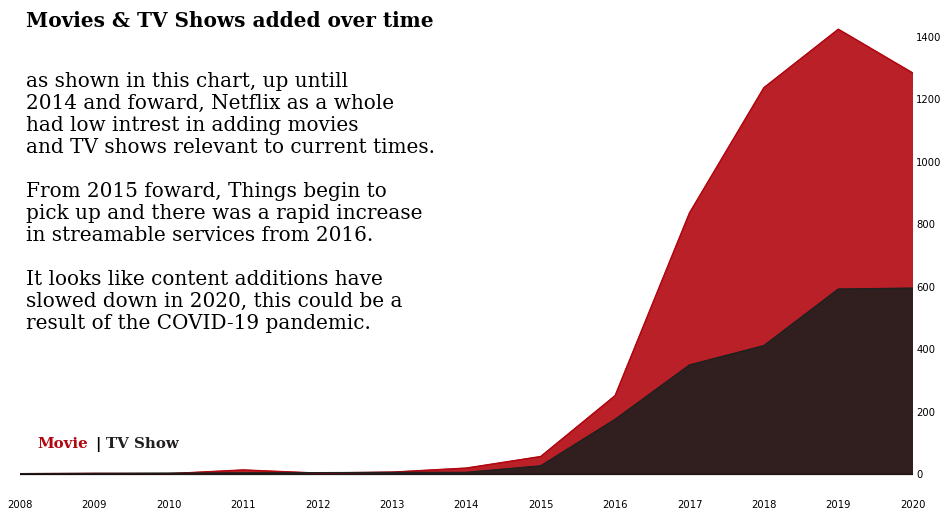

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.35, 
'''
as shown in this chart, up untill 
2014 and foward, Netflix as a whole 
had low intrest in adding movies 
and TV shows relevant to current times.

From 2015 foward, Things begin to 
pick up and there was a rapid increase
in streamable services from 2016.

It looks like content additions have 
slowed down in 2020, this could be a 
result of the COVID-19 pandemic.
'''

, fontsize=20, fontweight='light', fontfamily='serif')


fig.text(0.14,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

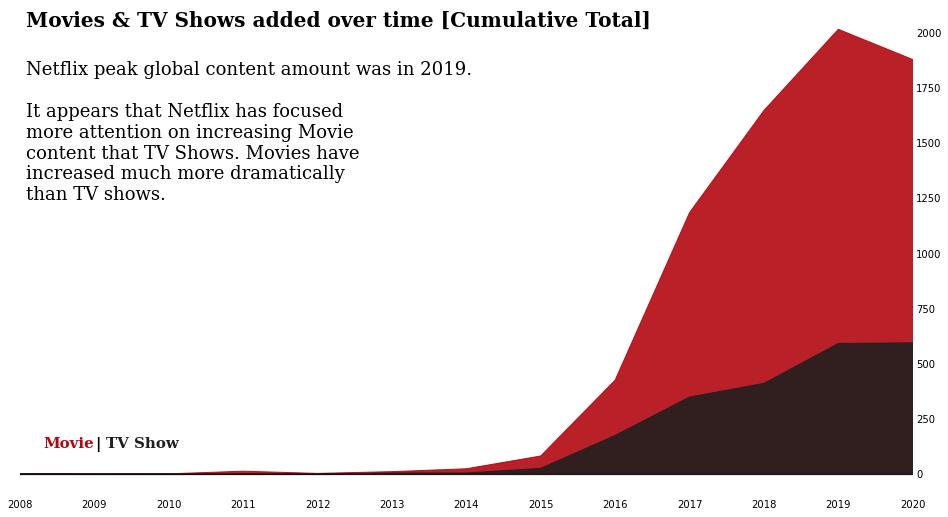

In [22]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.55, 
'''Netflix peak global content amount was in 2019.

It appears that Netflix has focused 
more attention on increasing Movie 
content that TV Shows. Movies have 
increased much more dramatically
than TV shows.
'''

, fontsize=18, fontweight='light', fontfamily='serif')



fig.text(0.145,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

In [23]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories = month_order, ordered=True)
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T


C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/2314646287.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



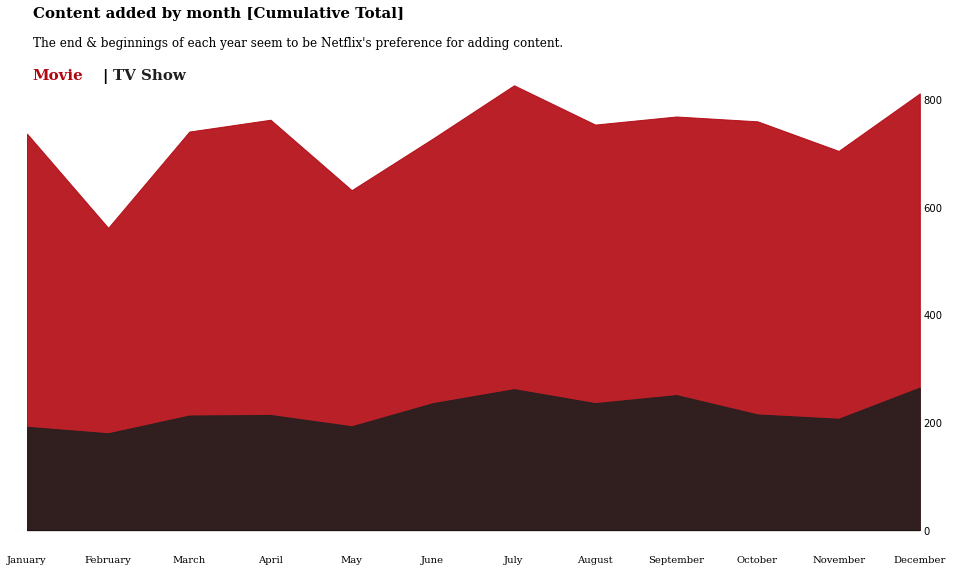

In [24]:


fig, ax = plt.subplots(1, 1, figsize=(16, 9))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()



C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/672450894.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 20 types in the Netflix Movie Dataset


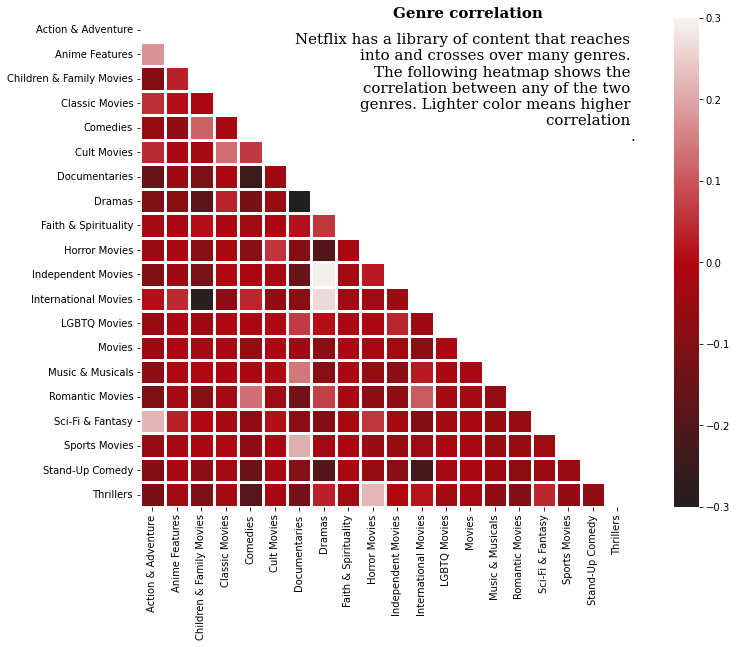

In [25]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(16, 9))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
            Netflix has a library of content that reaches 
            into and crosses over many genres. 
            The following heatmap shows the 
            correlation between any of the two 
            genres. Lighter color means higher 
            correlation 
.
             ''', fontfamily='serif',fontsize=15,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

In [26]:
data = df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

data

0          USA
1        India
2           UK
3       Canada
4        Japan
5       France
6     S. Korea
7        Spain
8       Mexico
9    Australia
Name: first_country, dtype: object

In [27]:
df_heatmap = df.loc[df['first_country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['rating'],normalize = "index").T


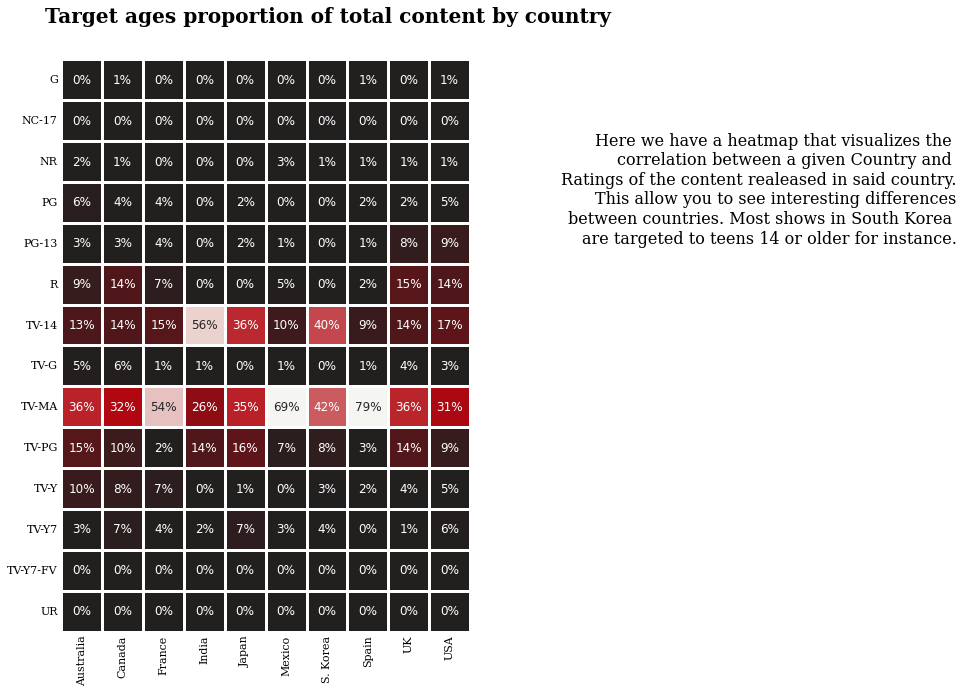

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain', 'Mexico', 'Turkey']

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap, square=True, linewidth=2.5, cbar=False, cmap = cmap, annot=True, fmt='1.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize":12})
 



fig.text(.8, 1.04, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=20,ha='right')   

fig.text(1.1, 0.7, 
'''Here we have a heatmap that visualizes the 
correlation between a given Country and 
Ratings of the content realeased in said country.
This allow you to see interesting differences
between countries. Most shows in South Korea 
are targeted to teens 14 or older for instance.''',ha='right', fontsize=16,fontfamily='serif') 

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()


C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/3936986320.py:10: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



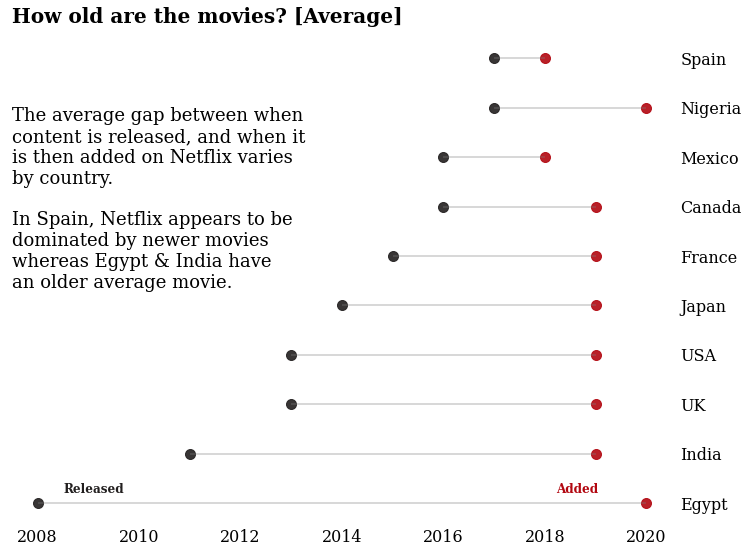

In [29]:
df_movies
df_tv

### Relevant groupings

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(12, 9))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=20, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=16)
plt.xticks(fontname = "serif",fontsize=16)
# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''

, fontsize=18, fontweight='light', fontfamily='serif')


#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()


C:\Users\dimet\AppData\Local\Temp/ipykernel_20316/1068673219.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



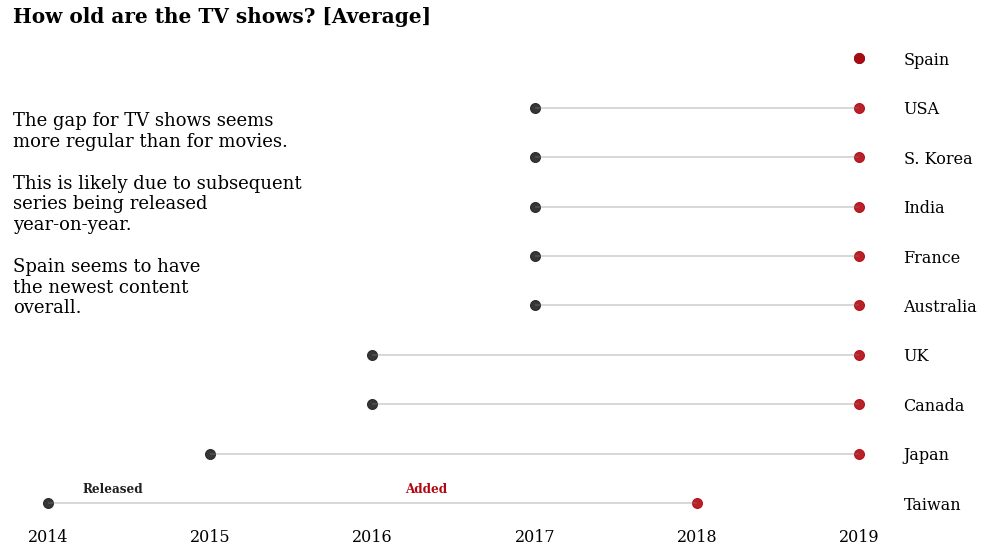

In [30]:
data = df_tv.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(16,9))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=20, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=16)
plt.xticks(fontname = "serif",fontsize=16)

fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')


fig.text(0.13, 0.42, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Spain seems to have
the newest content
overall.
'''

, fontsize=18, fontweight='light', fontfamily='serif')


ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.xlabel('Value of the variables')
#plt.ylabel('Group')
plt.show()


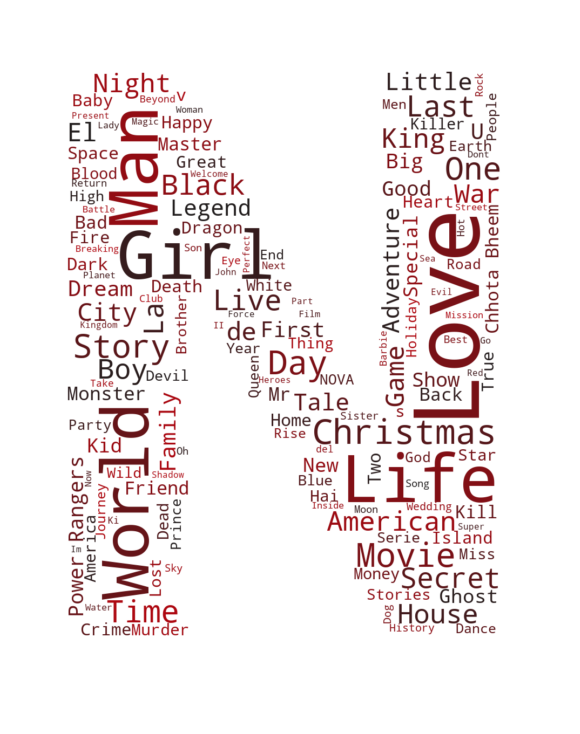

In [31]:
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open(pwd + '/neftlfix_mask.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()